In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [57]:
observations = 1000000


xs = np.random.uniform(-10, 10, (observations,1)) ## Creating a matrix of size 1000x1 to hold random generated values between -10 and 10
zs = np.random.uniform(-10, 10, (observations, 1)) ## Creating a matrix of size 1000x1 to hold random generated values between -10 and 10
print("xs: {} zs: {}".format(xs.shape, zs.shape))

## Creating a 1000x2 matrix using the numpy stack function
generated_inputs = np.column_stack((xs, zs))
print("Generated inputs: {}".format(generated_inputs.shape))

noise = np.random.uniform(-1, 1, (observations,1))
print("Noise: {}".format(noise.shape))

generated_targets = 2*xs - 3*zs + 5 + noise

xs: (1000000, 1) zs: (1000000, 1)
Generated inputs: (1000000, 2)
Noise: (1000000, 1)


In [58]:
np.savez('TF_intro', inputs=generated_inputs, outputs=generated_targets)

### Solving with TensorFlow

In [60]:
training_data = np.load('TF_intro.npz')

In [61]:
input_size = 2
output_size = 1

## Building model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(output_size, kernel_initializer=tf.random_uniform_initializer(minval=-.1, maxval=.1), bias_initializer=tf.random_uniform_initializer(-.1, .1))) ## Dense is essentially a dot product operation and we are specifying the number of outputs from model
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(custom_optimizer, 'mean_squared_error')
model.fit(training_data['inputs'], training_data['outputs'], epochs=100)


Epoch 1/100
31250/31250 [==============================] - 12s 388us/step - loss: 0.4054
Epoch 2/100
23263/31250 [=====================>........] - ETA: 3s - loss: 0.3809

KeyboardInterrupt: 

In [54]:
model.layers[0].get_weights()

[array([[ 1.9853567],
        [-3.018878 ]], dtype=float32),
 array([5.0003843], dtype=float32)]

### Extract the outputs (make predictions)

In [55]:
pred = model.predict_on_batch(training_data['inputs'].round(1))
print("Pred: {} Actual: {}".format(pred.round(1), training_data['outputs'].round(1)))

Pred: [[ -5.3]
 [-32.6]
 [ 21.6]
 ...
 [-13.6]
 [-13.4]
 [ 25.1]] Actual: [[ -5.6]
 [-31.7]
 [ 22.4]
 ...
 [-14.5]
 [-14.2]
 [ 25.4]]


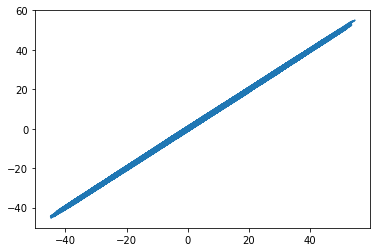

In [56]:
fig = plt.plot(pred, training_data['outputs'])